In [1]:
import sys
sys.path.append('/Users/zhengj10/Python/Modules')
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt
import yaml
import pandas as pd
import PatcherBot as pb
from glob import glob
import seaborn as sns
from scipy.stats import mannwhitneyu


In [38]:
imgPath = '/Volumes/genie/Jihong_GENIE_stuff/PatcherBot/raw/'
sumPath = '/Users/zhengj10/Desktop/Recent data/Voltron 2_with_reverse_voltage_step/'


### Following commented out code is for creation of dataframe

- Meta from experiment

In [13]:
datePath = ['2021.03.03_000']

In [14]:
columns = ['Date','Plate','Mutation','Cell']

In [16]:
data_all = {}
for column in columns:
    data_all[column] = []

for date in datePath:
    platePath = pb.getPathInfo(os.path.join(imgPath,date))
    
    for plate in platePath:
        idxFile = os.path.join(imgPath, date, plate, '.index')
        a = yaml.load(open(idxFile), Loader=yaml.FullLoader)
        mutation = a['.']['mutation_2']
        
        cellPath = pb.getPathInfo(os.path.join(imgPath, date, plate))
        
        for cell in(cellPath):
            
            if date=='2021.02.10_000' and plate=='plate_000' and cell=='patch_attempt_0003_000':
                continue
        
            if date=='2021.02.10_000' and plate=='plate_001' and cell=='patch_attempt_0030_000':
                continue
            
            trialPath = os.path.join(imgPath,date,plate,cell,'camera_clamp2_000')
#             print(trialPath)
            if not os.path.exists(trialPath):
                continue
            data_all['Date'].append(date)
            data_all['Plate'].append(plate)
            data_all['Mutation'].append(mutation)
            data_all['Cell'].append(cell)
            
#             daqData = os.path.join('trialPath','str(trial).zfill(3)','daqResult.ma')
#             imgData = os.path.join('trialPath','str(trial).zfill(3)','frames.ma')
            
            

In [17]:
for k,v in data_all.items():
    print(k,len(v))

Date 25
Plate 25
Mutation 25
Cell 25


In [18]:
df = pd.DataFrame(data_all)
df

,Date,Plate,Mutation,Cell
0,2021.03.03_000,plate_000,421.1,patch_attempt_0000_000
1,2021.03.03_000,plate_000,421.1,patch_attempt_0003_000
2,2021.03.03_000,plate_000,421.1,patch_attempt_0004_000
3,2021.03.03_000,plate_000,421.1,patch_attempt_0005_000
4,2021.03.03_000,plate_000,421.1,patch_attempt_0006_000
5,2021.03.03_000,plate_000,421.1,patch_attempt_0009_000
6,2021.03.03_000,plate_000,421.1,patch_attempt_0012_000
7,2021.03.03_000,plate_000,421.1,patch_attempt_0014_000
8,2021.03.03_000,plate_000,421.1,patch_attempt_0019_000
9,2021.03.03_000,plate_000,421.1,patch_attempt_0023_000


In [ ]:
# V_step_order = ['pos to neg','pos to neg','pos to neg','pos to neg','pos to neg','pos to neg',
#                'pos to neg','neg to pos','neg to pos','neg to pos','neg to pos','neg to pos','neg to pos',
#                 'neg to pos','pos to neg','pos to neg','pos to neg','pos to neg','pos to neg','neg to pos',
#                'neg to pos','neg to pos','neg to pos','neg to pos','neg to pos','neg to pos',]

In [19]:
# df['V_step_order'] = V_step_order

df['V_step_order'] = 'pos to neg'

- Calculate dFF and add to dataframe

In [20]:
def get_dff(trace,fb):
    f0 = np.mean(trace[300:400])
    df = np.mean(trace[950:1050])-f0
    dff = df/(f0-fb)
    return dff

2021.03.03_000 plate_000 patch_attempt_0000_000
2021.03.03_000 plate_000 patch_attempt_0003_000
2021.03.03_000 plate_000 patch_attempt_0004_000
2021.03.03_000 plate_000 patch_attempt_0005_000
2021.03.03_000 plate_000 patch_attempt_0006_000
2021.03.03_000 plate_000 patch_attempt_0009_000
2021.03.03_000 plate_000 patch_attempt_0012_000
2021.03.03_000 plate_000 patch_attempt_0014_000
2021.03.03_000 plate_000 patch_attempt_0019_000
2021.03.03_000 plate_000 patch_attempt_0023_000
2021.03.03_000 plate_001 patch_attempt_0025_000
2021.03.03_000 plate_001 patch_attempt_0028_000
2021.03.03_000 plate_001 patch_attempt_0029_000
2021.03.03_000 plate_001 patch_attempt_0031_000
2021.03.03_000 plate_001 patch_attempt_0032_000
2021.03.03_000 plate_001 patch_attempt_0034_000
2021.03.03_000 plate_001 patch_attempt_0035_000
2021.03.03_000 plate_001 patch_attempt_0036_000
2021.03.03_000 plate_002 patch_attempt_0037_000
2021.03.03_000 plate_002 patch_attempt_0038_000
2021.03.03_000 plate_002 patch_attempt_0

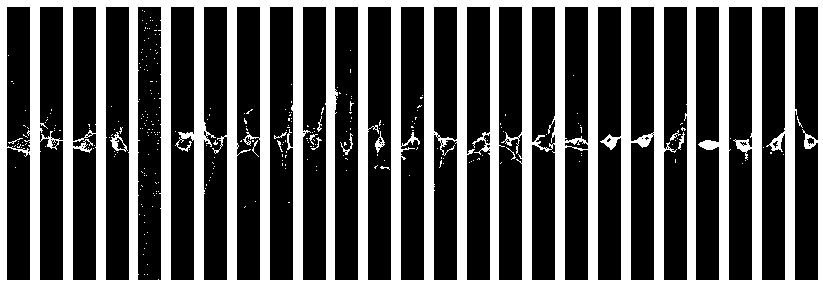

In [31]:
plt.figure(figsize=[12,10])
dFF_all = []

Leak = []





for i,r in df.iterrows():
    print(r['Date'],r['Plate'],r['Cell'])

    if r['V_step_order'] == 'pos to neg':
        imgData = os.path.join(imgPath,r['Date'],r['Plate'],r['Cell'],'camera_clamp2_000/000/Camera/frames.ma')
    else:
        imgData = os.path.join(imgPath,r['Date'],r['Plate'],r['Cell'],'camera_clamp2_000/008/Camera/frames.ma')
        
    imgData = h5py.File(imgData,'r')
    imgData = imgData['data'][()]
    
    p_val = []
    for row in range(imgData.shape[1]):
        for c in range(imgData.shape[2]):
            a = imgData[100:400,row,c]
            b = imgData[750:1050,row,c]
            stat, p = mannwhitneyu(a, b, alternative='two-sided')
            p_val.append(p)
            
    p_val_2d = np.reshape(p_val,[imgData.shape[1],imgData.shape[2]])
    thre = sorted(p_val)[500]
    mask = p_val_2d<thre
    ax = plt.subplot(1,26,i+1)
    ax.imshow(mask,cmap='gray')
    ax.axis('off')
  
    dff_single_cell = []
    leaks = []
    for trial in range(9):
        if r['V_step_order'] == 'pos to neg':
            imgData = os.path.join(imgPath,r['Date'],r['Plate'],r['Cell'],'camera_clamp2_000',str(8-trial).zfill(3),'Camera/frames.ma')
            ivFile = os.path.join(imgPath,r['Date'],r['Plate'],r['Cell'],'camera_clamp2_000',str(8-trial).zfill(3),'Clamp2.ma')
        
        else:
            imgData = os.path.join(imgPath,r['Date'],r['Plate'],r['Cell'],'camera_clamp2_000',str(trial).zfill(3),'Camera/frames.ma')
            ivFile = os.path.join(imgPath,r['Date'],r['Plate'],r['Cell'],'camera_clamp2_000',str(trial).zfill(3),'Clamp2.ma')
        
        imgData = h5py.File(imgData,'r')
        imgData = imgData['data'][()]
        
        ivData = h5py.File(ivFile,'r')
        ivData = ivData['data'][()]
        
        leak = np.mean(ivData[1][9000:11000])
        leak = leak * 1e12 # convert to pA
        leaks.append(leak)

        
        
        f_single_trial = []
        for frame in range(imgData.shape[0]):
            act_pix = imgData[frame,:,:]*mask
            f_single_frame = np.sum(act_pix)/np.sum(mask)
            f_single_trial.append(f_single_frame)
        imgMean = np.mean(imgData,axis=0)
        imgMean = imgMean.flatten()
        fb = sorted(imgMean)[int(imgMean.shape[0]*0.8)]
        dff_single_trial = get_dff(f_single_trial,fb)
        dff_single_cell.append(dff_single_trial)
    dFF_all.append(dff_single_cell)
    Leak.append(leaks)

#     F_all = []
#     for frame in range(imgData.shape[0]):
#         F = np.mean(imgData[frame,240:272,:])
#         F_all.append(F)
#     ax = plt.subplot(6,5,i+1)
#     ax.plot(F_all[:1700])

plt.tight_layout()
# plt.savefig(sumPath+'mask.png')
plt.show()


In [32]:
df['dFF'] = dFF_all


In [33]:
df['Leak'] = Leak

### Plot

- Load data

In [41]:
df = pd.read_pickle(sumPath+'Voltron 2_with_opposite_voltage_steps_order.pkl')
df = pd.read_pickle(sumPath+'Voltron 2_with_opposite_voltage_steps_order_lowest_6_percent_pixel_val_as_fb.pkl')
df
# df.to_pickle(sumPath+'Voltron 2_with_opposite_voltage_steps_order_lowest_6_percent_pixel_val_as_fb.pkl')

,Date,Plate,Mutation,Cell,V_step_order,Leaks,dFF
0,2021.02.10_000,plate_000,421.2096,patch_attempt_0000_000,pos to neg,"[-4.595841131590047, -10.681639071704437, -13....","[0.20923277268962684, 0.10150372619830435, -0...."
1,2021.02.10_000,plate_000,421.2096,patch_attempt_0002_000,pos to neg,"[-142.9751859330534, -145.86927134199576, -158...","[0.15166870102130295, 0.07764466645291507, 0.0..."
2,2021.02.10_000,plate_000,421.2096,patch_attempt_0004_000,pos to neg,"[-446.93309726285145, -785.966621791044, -949....","[0.10293226139337039, 0.04791179396298589, 0.0..."
3,2021.02.10_000,plate_000,421.2096,patch_attempt_0006_000,pos to neg,"[-204.5903603474374, -284.7349304214703, -287....","[0.11939857059077458, 0.053809361706283816, -0..."
4,2021.02.10_000,plate_000,421.2096,patch_attempt_0007_000,pos to neg,"[-59.9218620151676, -52.15778468635883, -52.63...","[0.17852989804991143, 0.09124814770582493, 0.0..."
5,2021.02.10_000,plate_000,421.2096,patch_attempt_0008_000,pos to neg,"[-159.31436062645093, -143.27813026795977, -20...","[0.1957859770127426, 0.10197079978967137, 0.00..."
6,2021.02.10_000,plate_000,421.2096,patch_attempt_0009_000,pos to neg,"[-73.59013159997349, -96.08487841052519, -85.4...","[0.14739147537490155, 0.07769842566405237, -0...."
7,2021.02.10_000,plate_000,421.2096,patch_attempt_0010_000,neg to pos,"[-54.41987678463206, -72.53562744266546, -38.2...","[0.16870000503958857, 0.08631104586733551, 0.0..."
8,2021.02.10_000,plate_000,421.2096,patch_attempt_0015_000,neg to pos,"[-55.26344760635324, -212.01700857170528, -192...","[0.18883962396431136, 0.08813505064497233, 0.0..."
9,2021.02.10_000,plate_000,421.2096,patch_attempt_0016_000,neg to pos,"[-249.3136468894106, -635.3114481023744, -981....","[0.17767818558177753, 0.060095261845330955, -2..."


- FV curve

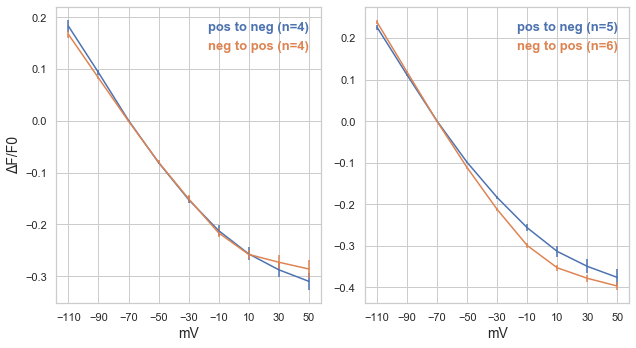

In [42]:
from matplotlib import font_manager

plt.figure(figsize=[9,5])
sns.set(style='whitegrid')
x = np.linspace(-110,50,9)

sensors = ['421.2096','476.4495']

subplot_pos = 1
for sensor in sensors:
    dFF_pos_to_neg = []
    dFF_neg_to_pos = []
    df_sensor = df[df.Mutation == sensor]
    for i,r in df_sensor.iterrows():
        if np.min(r['Leaks'])<-300:
            continue

        if r['V_step_order'] == 'pos to neg':
            dFF_pos_to_neg.append(r['dFF'])
        else:
            dFF_neg_to_pos.append(r['dFF'])

    pos_to_neg_mean = np.mean(dFF_pos_to_neg,axis = 0)
    pos_to_neg_sem = np.std(dFF_pos_to_neg,axis = 0)/np.sqrt(len(dFF_pos_to_neg))

    neg_to_pos_mean = np.mean(dFF_neg_to_pos,axis = 0)
    neg_to_pos_sem = np.std(dFF_neg_to_pos,axis = 0)/np.sqrt(len(dFF_neg_to_pos))

    ax1 = plt.subplot(1,2,subplot_pos)
    ax1.errorbar(x,pos_to_neg_mean,yerr=pos_to_neg_sem,label='pos to neg (n=%d)' %(len(dFF_pos_to_neg)))
    ax1.errorbar(x,neg_to_pos_mean,yerr=neg_to_pos_sem,label='neg to pos (n=%d)' %(len(dFF_neg_to_pos)))
    
    font = font_manager.FontProperties(weight='bold',style='normal',size=13)
    leg = ax1.legend(handlelength=0,handletextpad = -0.21,markerscale=0,bbox_to_anchor=(1,0.99),
                     frameon=False,prop=font)

    for item in leg.legendHandles: # remove error marker in legend
        item.set_visible(False)

    for artist, text in zip(leg.legendHandles, leg.get_texts()): # set text the same color as line
        col = artist.get_color()
        if isinstance(col, np.ndarray):
            col = col[0]
        text.set_color(col)
        
    ax1.set_xlabel('mV',size=14)
    if subplot_pos == 1:
        ax1.set_ylabel('\u0394F/F0',size=14)
    subplot_pos += 1
    plt.setp(ax1, xticks=x)

# plt.legend()
plt.tight_layout()
# plt.savefig(sumPath+'Voltron 2_different_order_voltage_steps.png')
# plt.savefig(sumPath+'Voltron 2_different_order_voltage_steps_lowest_6_percent_pixel_val_as_fb.png')
# plt.savefig(sumPath+'Voltron 2_different_order_voltage_steps_lowest_10_percent_single_pixel_val_as_fb.png')
plt.show()


### Generate tif file manual ROI segmentation & dFF plotting

In [6]:
# df = pd.read_pickle(sumPath+'Voltron 2_with_opposite_voltage_steps_order.pkl')
df = pd.read_pickle(sumPath+'Voltron 2_with_opposite_voltage_steps_order_lowest_6_percent_pixel_val_as_fb.pkl')
df
# df.to_pickle(sumPath+'Voltron 2_with_opposite_voltage_steps_order_lowest_6_percent_pixel_val_as_fb.pkl')

,Date,Plate,Mutation,Cell,V_step_order,Leaks,dFF
0,2021.02.10_000,plate_000,421.2096,patch_attempt_0000_000,pos to neg,"[-4.595841131590047, -10.681639071704437, -13....","[0.20923277268962684, 0.10150372619830435, -0...."
1,2021.02.10_000,plate_000,421.2096,patch_attempt_0002_000,pos to neg,"[-142.9751859330534, -145.86927134199576, -158...","[0.15166870102130295, 0.07764466645291507, 0.0..."
2,2021.02.10_000,plate_000,421.2096,patch_attempt_0004_000,pos to neg,"[-446.93309726285145, -785.966621791044, -949....","[0.10293226139337039, 0.04791179396298589, 0.0..."
3,2021.02.10_000,plate_000,421.2096,patch_attempt_0006_000,pos to neg,"[-204.5903603474374, -284.7349304214703, -287....","[0.11939857059077458, 0.053809361706283816, -0..."
4,2021.02.10_000,plate_000,421.2096,patch_attempt_0007_000,pos to neg,"[-59.9218620151676, -52.15778468635883, -52.63...","[0.17852989804991143, 0.09124814770582493, 0.0..."
5,2021.02.10_000,plate_000,421.2096,patch_attempt_0008_000,pos to neg,"[-159.31436062645093, -143.27813026795977, -20...","[0.1957859770127426, 0.10197079978967137, 0.00..."
6,2021.02.10_000,plate_000,421.2096,patch_attempt_0009_000,pos to neg,"[-73.59013159997349, -96.08487841052519, -85.4...","[0.14739147537490155, 0.07769842566405237, -0...."
7,2021.02.10_000,plate_000,421.2096,patch_attempt_0010_000,neg to pos,"[-54.41987678463206, -72.53562744266546, -38.2...","[0.16870000503958857, 0.08631104586733551, 0.0..."
8,2021.02.10_000,plate_000,421.2096,patch_attempt_0015_000,neg to pos,"[-55.26344760635324, -212.01700857170528, -192...","[0.18883962396431136, 0.08813505064497233, 0.0..."
9,2021.02.10_000,plate_000,421.2096,patch_attempt_0016_000,neg to pos,"[-249.3136468894106, -635.3114481023744, -981....","[0.17767818558177753, 0.060095261845330955, -2..."


In [9]:
df_sel = df[(df.Mutation=='421.2096')&(df.V_step_order=='pos to neg')]
df_sel

,Date,Plate,Mutation,Cell,V_step_order,Leaks,dFF
0,2021.02.10_000,plate_000,421.2096,patch_attempt_0000_000,pos to neg,"[-4.595841131590047, -10.681639071704437, -13....","[0.20923277268962684, 0.10150372619830435, -0...."
1,2021.02.10_000,plate_000,421.2096,patch_attempt_0002_000,pos to neg,"[-142.9751859330534, -145.86927134199576, -158...","[0.15166870102130295, 0.07764466645291507, 0.0..."
2,2021.02.10_000,plate_000,421.2096,patch_attempt_0004_000,pos to neg,"[-446.93309726285145, -785.966621791044, -949....","[0.10293226139337039, 0.04791179396298589, 0.0..."
3,2021.02.10_000,plate_000,421.2096,patch_attempt_0006_000,pos to neg,"[-204.5903603474374, -284.7349304214703, -287....","[0.11939857059077458, 0.053809361706283816, -0..."
4,2021.02.10_000,plate_000,421.2096,patch_attempt_0007_000,pos to neg,"[-59.9218620151676, -52.15778468635883, -52.63...","[0.17852989804991143, 0.09124814770582493, 0.0..."
5,2021.02.10_000,plate_000,421.2096,patch_attempt_0008_000,pos to neg,"[-159.31436062645093, -143.27813026795977, -20...","[0.1957859770127426, 0.10197079978967137, 0.00..."
6,2021.02.10_000,plate_000,421.2096,patch_attempt_0009_000,pos to neg,"[-73.59013159997349, -96.08487841052519, -85.4...","[0.14739147537490155, 0.07769842566405237, -0...."


In [12]:
from skimage.io import imsave
for i,r in df_sel.iterrows():
    if np.min(r['Leaks'])<-300:
            continue
    for trial in range(9):
        imgData = os.path.join(imgPath,r['Date'],r['Plate'],r['Cell'],'camera_clamp1_000',str(trial).zfill(3),'Camera/frames.ma')
        imgData = h5py.File(imgData,'r')
        imgData = imgData['data'][()]
        savePath = sumPath+'manual_ROI/'+r['Cell'][-8:-4]
        if not os.path.exists(savePath):
            os.mkdir(savePath)
        imsave(savePath+'/'+str(trial).zfill(3)+'.tif',imgData)

/Users/zhengj10/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: /Users/zhengj10/Desktop/Recent data/Voltron 2/manual_ROI/0000/000.tif is a low contrast image
  if sys.path[0] == '':
/Users/zhengj10/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: /Users/zhengj10/Desktop/Recent data/Voltron 2/manual_ROI/0000/001.tif is a low contrast image
  if sys.path[0] == '':
/Users/zhengj10/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: /Users/zhengj10/Desktop/Recent data/Voltron 2/manual_ROI/0000/002.tif is a low contrast image
  if sys.path[0] == '':
/Users/zhengj10/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: /Users/zhengj10/Desktop/Recent data/Voltron 2/manual_ROI/0000/003.tif is a low contrast image
  if sys.path[0] == '':
/Users/zhengj10/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: /Users/zhengj10/Desktop/Recent data/Voltron